In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset 
file_path = r'C:\repos\Project_3_Team_8\rbhatia\play_by_play_2024.csv'
df = pd.read_csv(file_path, low_memory=False)

In [2]:
# Filter data for Week 1 games
week1_data = df[df['week'] == 1]


In [3]:
# Calculate offensive performance (sum of EPA) for each team
offensive_performance = week1_data.groupby('posteam')['epa'].sum().reset_index().rename(columns={'epa': 'offensive_epa'})

In [4]:
# Calculate defensive performance (sum of EPA allowed) for each team
defensive_performance = week1_data.groupby('defteam')['epa'].sum().reset_index().rename(columns={'epa': 'defensive_epa'})

In [5]:
# Merge offensive and defensive performance data
performance = pd.merge(offensive_performance, defensive_performance, left_on='posteam', right_on='defteam', suffixes=('_offense', '_defense'))
performance = performance[['posteam', 'offensive_epa', 'defensive_epa']]

In [6]:
# Calculate percentages for offensive and defensive EPA
performance['offensive_percentage'] = 100 * (performance['offensive_epa'] / performance['offensive_epa'].sum())
performance['defensive_percentage'] = 100 * (performance['defensive_epa'] / performance['defensive_epa'].sum())


In [7]:
# Sort teams by offensive and defensive performance for visualization
performance_sorted = performance.sort_values(by='offensive_epa', ascending=False)

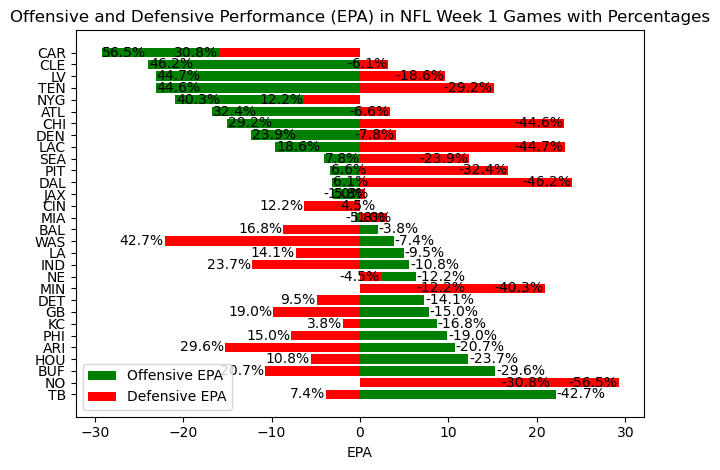

In [8]:
# Plot offensive EPA with percentages
bars = plt.barh(performance_sorted['posteam'], performance_sorted['offensive_epa'], color='green', label='Offensive EPA')

# Add offensive percentage labels
for bar, percentage in zip(bars, performance_sorted['offensive_percentage']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

# Plot defensive EPA (negate for visualization) with percentages
bars_defense = plt.barh(performance_sorted['posteam'], -performance_sorted['defensive_epa'], color='red', label='Defensive EPA')

# Add defensive percentage labels
for bar, percentage in zip(bars_defense, performance_sorted['defensive_percentage']):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{-percentage:.1f}%', va='center', ha='right')

plt.xlabel('EPA')
plt.title('Offensive and Defensive Performance (EPA) in NFL Week 1 Games with Percentages')
plt.legend()

plt.tight_layout()
plt.show()
